In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [10]:
X = pd.read_pickle('../artifacts/feature_columns.pkl')
X_train_scaled = np.load('../artifacts/X_train_scaled.npy')
X_test_scaled = np.load('../artifacts/X_test_scaled.npy')
y_train = np.load('../artifacts/y_train.npy')
y_test = np.load('../artifacts/y_test.npy')

In [11]:
df = pd.read_pickle('../artifacts/processed_data.pkl')
features = ['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 
           'Rainfall (mm)', 'Solar Radiation (W/m²)', 'Electricity Demand (MW)']

In [12]:
correlation_matrix = df[features].corr()

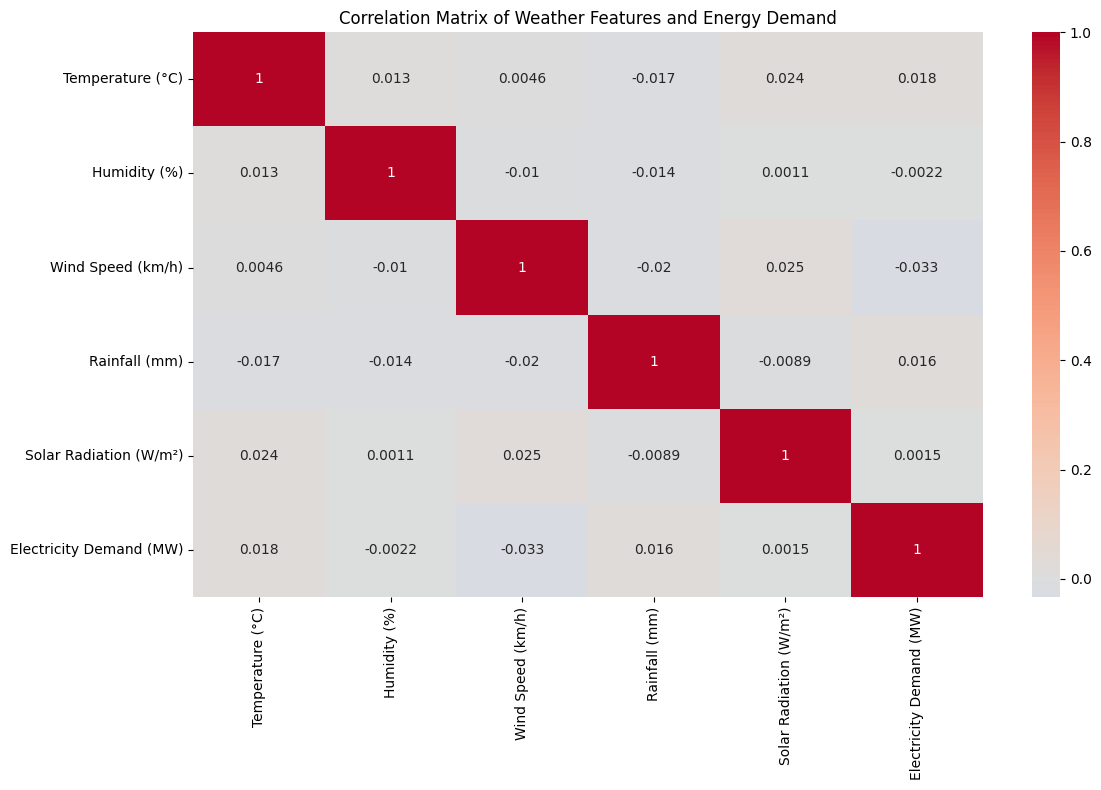

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Weather Features and Energy Demand')
plt.tight_layout()
plt.show()

In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [15]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

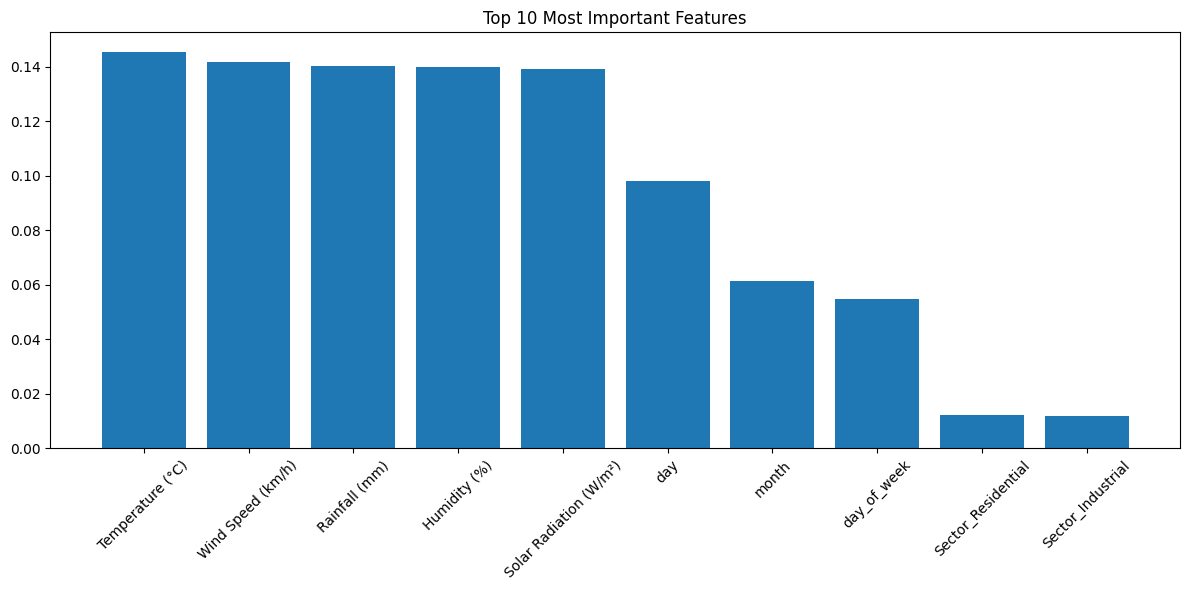

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Most Important Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
                   feature  importance
0         Temperature (°C)    0.145445
2        Wind Speed (km/h)    0.141728
3            Rainfall (mm)    0.140260
1             Humidity (%)    0.140012
4   Solar Radiation (W/m²)    0.139310
6                      day    0.098173
7                    month    0.061445
9              day_of_week    0.054897
16      Sector_Residential    0.012352
15       Sector_Industrial    0.011936


<Figure size 1500x1500 with 0 Axes>

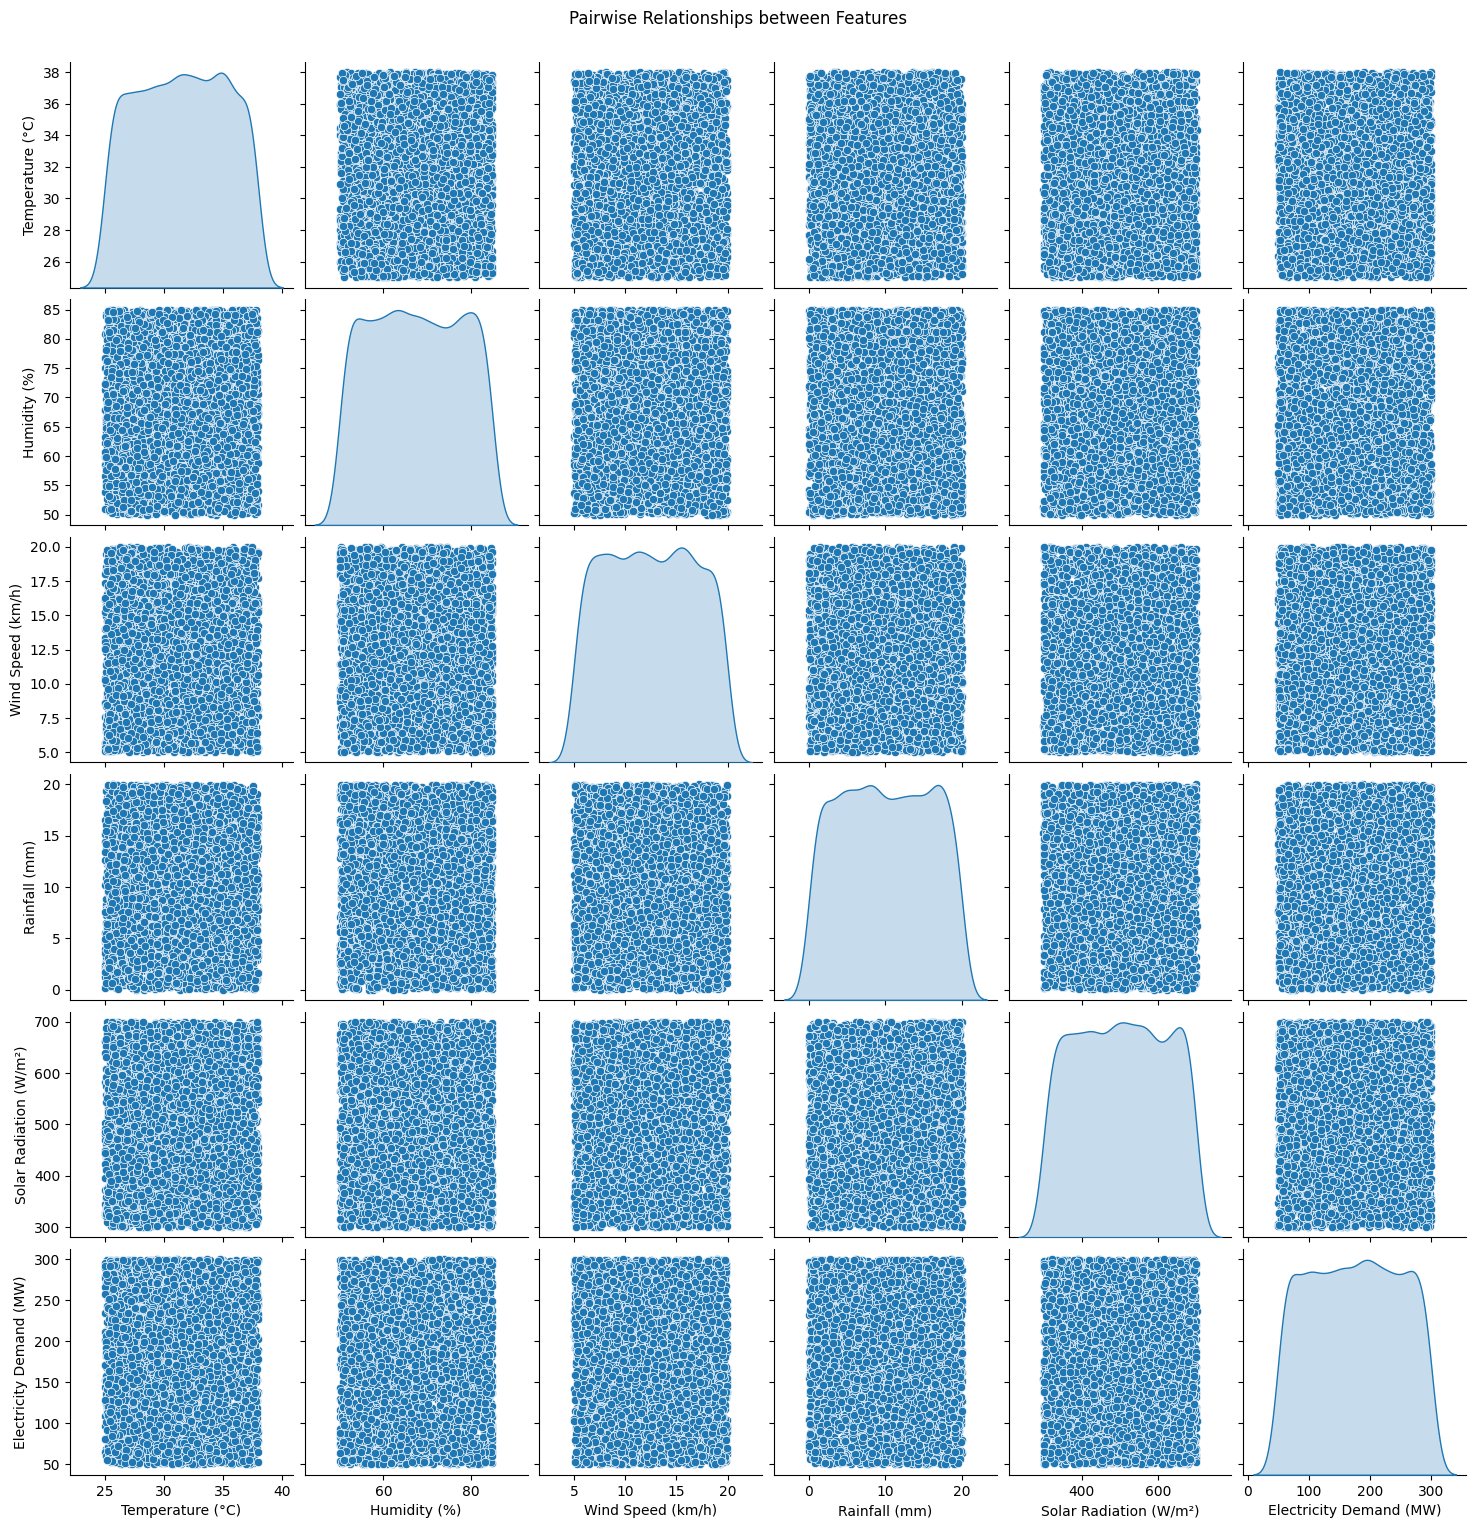

In [18]:
plt.figure(figsize=(15, 15))
sns.pairplot(df[features], diag_kind='kde')
plt.suptitle('Pairwise Relationships between Features', y=1.02)
plt.show()

In [21]:
df['hour'] = pd.to_datetime(df['Date']).dt.hour
hourly_correlation = df.groupby('hour')['Electricity Demand (MW)'].mean()

In [22]:
correlation_results = {
    'correlation_matrix': correlation_matrix,
    'feature_importance': feature_importance,
    'hourly_correlation': hourly_correlation
}
joblib.dump(correlation_results, '../artifacts/correlation_results.joblib')

['../artifacts/correlation_results.joblib']